In [55]:
from google.colab import files
uploaded = files.upload()

Saving emp_data.csv to emp_data.csv


In [56]:
import pandas as pd
import io


In [57]:
import numpy as np
import matplotlib.pyplot as plt



In [58]:
df = pd.read_csv(io.BytesIO(uploaded['emp_data.csv']))
print(df)

   Salary_hike  Churn_out_rate
0         1580              92
1         1600              85
2         1610              80
3         1640              75
4         1660              72
5         1690              70
6         1706              68
7         1730              65
8         1800              62
9         1870              60


In [59]:
df=df.rename(columns={'Salary_hike': "salaryhike", 'Churn_out_rate' : "churnoutrate"})
df

,salaryhike,churnoutrate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


(array([2., 1., 1., 2., 1., 0., 1., 1., 0., 1.]),
 array([60. , 63.2, 66.4, 69.6, 72.8, 76. , 79.2, 82.4, 85.6, 88.8, 92. ]),
 <a list of 10 Patch objects>)

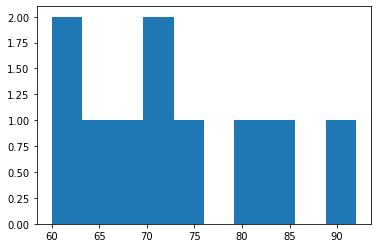

In [60]:
plt.hist(df.churnoutrate)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4177968810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f41779c8390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4177970a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4177970650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4177968e90>,
  <matplotlib.lines.Line2D at 0x7f4177968590>]}

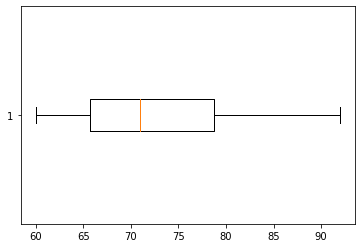

In [61]:
plt.boxplot(df.churnoutrate,0,"rs",0)

Text(0, 0.5, 'churnoutrate')

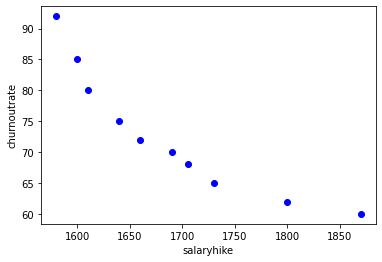

In [62]:
plt.plot(df.salaryhike,df.churnoutrate,"bo");plt.xlabel("salaryhike");plt.ylabel("churnoutrate")

In [64]:
import statsmodels.formula.api as smf
model=smf.ols("churnoutrate~salaryhike",data=df).fit()
model.params

Intercept     244.364911
salaryhike     -0.101543
dtype: float64

In [65]:
model.summary()


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           churnoutrate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           0.000239
Time:                        03:49:24   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.3649     27.352      8.934      0.000     181.291     307.439
salaryhike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
pred=model.predict(df)
pred

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

Text(0, 0.5, 'churnoutrate')

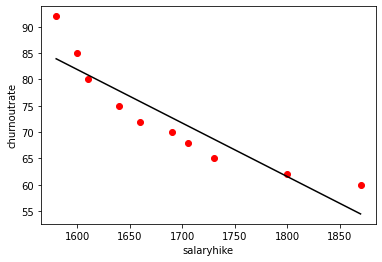

In [67]:
import matplotlib.pyplot as plt
plt.scatter(x=df['salaryhike'],y=df['churnoutrate'],color='red');plt.plot(df['salaryhike'],pred,color='black');plt.xlabel("salaryhike");plt.ylabel("churnoutrate")

In [68]:
pred.corr(df.churnoutrate)


0.9117216186909112

In [69]:
#Transforming variables for accuracy
model1=smf.ols("churnoutrate~np.log(salaryhike)", data=df).fit()
model1
model.params
model1.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           churnoutrate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           0.000153
Time:                        03:53:07   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(salaryhike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
pred1=model1.predict(df)
pred1

0    84.376270
1    82.161024
2    81.063764
3    77.812415
4    75.677725
5    72.523437
6    70.863969
7    68.403723
8    61.418285
9    54.699388
dtype: float64

In [71]:
pred1.corr(df.churnoutrate)

0.921207731211884

Text(0, 0.5, 'churnoutrate')

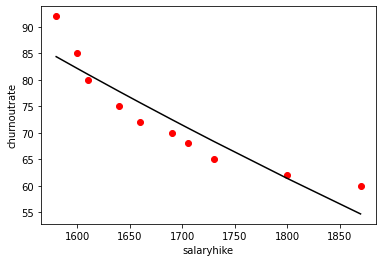

In [72]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=df['salaryhike'],y=df['churnoutrate'],color='red');plt.plot(df['salaryhike'],pred1,color='black');plt.xlabel("salaryhike");plt.ylabel("churnoutrate")

In [73]:
#Exponential Transformation
model2=smf.ols("np.log(churnoutrate)~salaryhike",data=df).fit()
model2.summary()
pred2=model2.predict(df)
pred2

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    4.432091
1    4.404164
2    4.390201
3    4.348311
4    4.320384
5    4.278494
6    4.256153
7    4.222641
8    4.124897
9    4.027154
dtype: float64

In [74]:
pred2.corr(df.churnoutrate)

0.9117216186909107

Text(0, 0.5, 'churnoutrate')

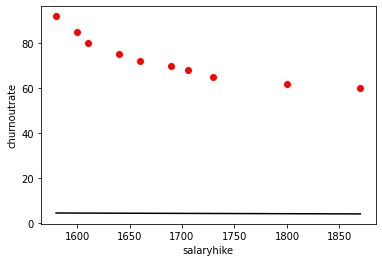

In [76]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=df.salaryhike,y=df.churnoutrate,color='red');plt.plot(df.salaryhike,pred2,color='black');plt.xlabel("salaryhike");plt.ylabel("churnoutrate")

In [78]:
#Quadratic Transformation
df["salaryhike_Sq"]=df.salaryhike*df.salaryhike
model3=smf.ols('churnoutrate~salaryhike_Sq',data=df).fit()
model3.summary()
pred3=model3.predict(df)
pred3

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    83.481163
1    81.625246
2    80.688534
3    77.843379
4    75.917428
5    72.984730
6    71.399147
7    68.992759
8    61.782116
9    54.285498
dtype: float64

Text(0, 0.5, 'churnoutrate')

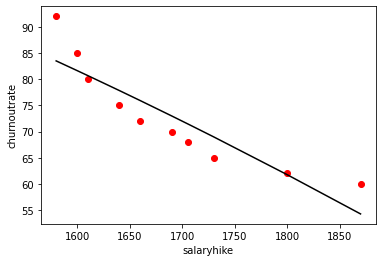

In [79]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=df["salaryhike"],y=df["churnoutrate"],color='red');plt.plot(df["salaryhike"],pred3,color='black');plt.xlabel("salaryhike");plt.ylabel("churnoutrate")